In [1]:
%load_ext rpy2.ipython

In [10]:
%%R
install.packages("readr", repos='http://cran.us.r-project.org')
install.packages("dplyr", repos='http://cran.us.r-project.org')
install.packages("ggplot2", repos='http://cran.us.r-project.org')
install.packages("tidyr", repos='http://cran.us.r-project.org')
install.packages("cowplot", repos = "http://cran.us.r-project.org")

library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(cowplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/readr_2.1.5.tar.gz'
Content type 'application/x-gzip' length 298065 bytes (291 KB)
downloaded 291 KB


The downloaded source packages are in
	‘/tmp/RtmpOQXOH6/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpOQXOH6/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/ggplot2_3.5.2.tar.gz'
Content type 'application/x-gzip' length 3580451 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/tmp/RtmpOQXOH6/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-libr

In [11]:
%%R
finch_12 <- read.csv("finch_beaks_2012.csv")
finch_75 <- read.csv("finch_beaks_1975.csv")
colnames(finch_75) <- colnames(finch_12)

finch_12$year <- 2012
finch_75$year <- 1975

finch_full <- rbind(finch_12, finch_75)
finch_full$year <- as.factor(finch_full$year)

In [12]:
%%R
str(finch_12)

'data.frame':	248 obs. of  5 variables:
 $ band   : int  19022 19028 19032 19041 19044 19048 19072 19082 19104 19114 ...
 $ species: chr  "fortis" "fortis" "fortis" "fortis" ...
 $ blength: num  10 12.5 9.3 10.3 11 10.1 9.6 10.9 10.3 9.8 ...
 $ bdepth : num  8.5 8.9 7.5 9.6 9.2 8.2 7.8 8.6 8.4 7.7 ...
 $ year   : num  2012 2012 2012 2012 2012 ...


In [13]:
%%R
unique(finch_12$species)


[1] "fortis"   "scandens"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


In addition: Warning message:
Removed 80 rows containing missing values or values outside the scale range
(`geom_bar()`). 


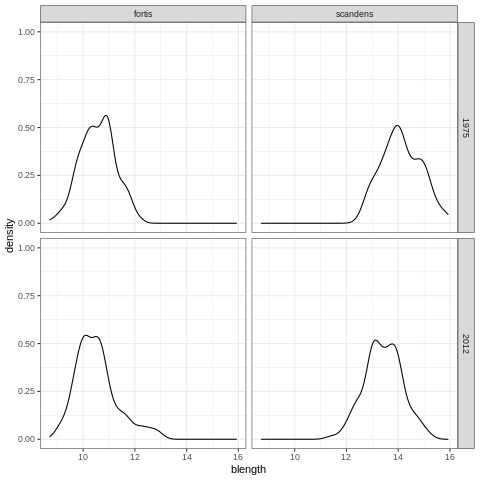

In [14]:
%%R
# Распределение по длине клюва
p_len <- ggplot(finch_full, aes(blength)) +
  geom_density() +
  facet_grid(year ~ species) +
  scale_y_continuous(limits = c(0, 1)) +
  theme_bw()

# Распределение по глубине клюва
p_dep <- ggplot(finch_full, aes(bdepth)) +
  geom_histogram() +
  facet_grid(year ~ species) +
  scale_y_continuous(limits = c(0, 1)) +
  theme_bw()

# Склеить графики
plot_grid(p_dep, p_len)

# Отобразить отдельно
p_len


In [16]:
%%R
shapiro.test(finch_12[finch_12$species == 'fortis', ]$blength)



	Shapiro-Wilk normality test

data:  finch_12[finch_12$species == "fortis", ]$blength
W = 0.94178, p-value = 5.261e-05



In [17]:
%%R
t.test(finch_12[finch_12$species == 'fortis', ]$blength,
       finch_12[finch_12$species == 'scandens', ]$blength)



	Welch Two Sample t-test

data:  finch_12[finch_12$species == "fortis", ]$blength and finch_12[finch_12$species == "scandens", ]$blength
t = -29.825, df = 239.69, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.095454 -2.711883
sample estimates:
mean of x mean of y 
 10.51736  13.42102 



In [19]:
%%R
wilcox.test(finch_12[finch_12$species == 'fortis', ]$blength,
            finch_12[finch_12$species == 'scandens', ]$blength)



	Wilcoxon rank sum test with continuity correction

data:  finch_12[finch_12$species == "fortis", ]$blength and finch_12[finch_12$species == "scandens", ]$blength
W = 126, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0

